In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)
%matplotlib inline

In [19]:
def load_data_from_file(fileName = "advertising (1).csv"):
   data = np.genfromtxt(fileName, dtype=float, delimiter=',', skip_header=1)    
   features_X = data[:, :3]
   sales_Y = data[:, 3]
   ones = np.ones((features_X.shape[0], 1))
   features_X = np.hstack((ones, features_X))
   return features_X, sales_Y

In [20]:
#Question 2
features_X, _ = load_data_from_file("advertising (1).csv")
print (features_X [:5 , :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [18]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


Excercise 2

In [23]:
def create_individual(n=4, bound=10):
    individual = []
    individual = [random.uniform(-bound/2, bound/2) for _ in range(n)]
    return individual

In [26]:
individual = create_individual()
print(individual)

[-0.23403045847644144, 0.8338203945503118, 4.081128851953352, 0.046868558173902564]


Excercise 3


In [30]:
features_X, sales_Y = load_data_from_file()
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    fitness = 1/(compute_loss(individual)+1)
    return fitness

In [31]:
# question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


Excersie 4

In [55]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i], individual2_new[i] = (individual2_new[i], individual1_new[i])
            
    return individual1_new, individual2_new

In [56]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


Excercise 5

In [57]:
def mutate(individual, mutation_rate=0.05):
    individual_m = individual.copy()

    
    individual_m = individual.copy()
    
    for i in range(len(individual_m)):
        if random.random() < mutation_rate:
            
            individual_m[i] += random.uniform(-1, 1)
    
    return individual_m


    return individual_m

In [58]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(before_individual, mutation_rate=2.0)
print(before_individual == after_individual)

False


Exercise 6

In [59]:
def initializePopulation(m):
    population = [create_individual() for _ in range(m)]
    return population

In [60]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [70]:
population = initializePopulation(m=100)
individual_s = selection(population, m=100)
print(individual_s)

[2.180686304400986, -2.4450718598233045, 4.538541578108889, -0.4236990370848055]


Exercise 8

In [80]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        parent1 = selection(sorted_population, m-elitism)
        parent2 = selection(sorted_population, m-elitism)
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1)
        child2 = mutate(child2)
        new_population.append(child1)
        if len(new_population) < m:
            new_population.append(child2)
    
    # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind)


    return new_population, compute_loss(sorted_population[m-1])

In [81]:
# Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


Excercise 9

In [103]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(1, n_generations):
        population, current_loss = create_new_population(population)
        losses_list.append(current_loss)
        
  return losses_list

In [106]:
losses_list= run_GA()

Best loss: 1555.171631676306 with chromsome:  [0.5698776679330884, 0.13257232908103855, 2.260731794731292, -1.2719807237478986]
Best loss: 501.4760243278506 with chromsome:  [-3.7005451944517165, -0.011751896973883014, -0.580172373551445, 0.5358501079077262]
Best loss: 501.4760243278506 with chromsome:  [-3.7005451944517165, -0.011751896973883014, -0.580172373551445, 0.5358501079077262]
Best loss: 501.4760243278506 with chromsome:  [-3.7005451944517165, -0.011751896973883014, -0.580172373551445, 0.5358501079077262]
Best loss: 501.4760243278506 with chromsome:  [-3.7005451944517165, -0.011751896973883014, -0.580172373551445, 0.5358501079077262]
Best loss: 146.1678311309474 with chromsome:  [-1.0618919205273847, 0.048545443237859365, -0.23233301208150348, 0.5708316434137553]
Best loss: 146.1678311309474 with chromsome:  [-1.0618919205273847, 0.048545443237859365, -0.23233301208150348, 0.5708316434137553]
Best loss: 146.1678311309474 with chromsome:  [-1.0618919205273847, 0.04854544323785

Excercise 10

Best loss: 1429.4913630098067 with chromsome:  [-1.6260970980340597, 0.03065099340885613, -1.2080421028331765, 1.7288739699654476]
Best loss: 149.7128610089271 with chromsome:  [1.600101883097257, 0.03063574465391916, -0.21204627748382965, 0.5679573242038476]
Best loss: 149.7128610089271 with chromsome:  [1.600101883097257, 0.03063574465391916, -0.21204627748382965, 0.5679573242038476]
Best loss: 149.7128610089271 with chromsome:  [1.600101883097257, 0.03063574465391916, -0.21204627748382965, 0.5679573242038476]
Best loss: 92.30145422314835 with chromsome:  [4.179564149196718, 0.03920738674715896, 0.5753467316317424, -0.049391299670913824]
Best loss: 92.30145422314835 with chromsome:  [4.179564149196718, 0.03920738674715896, 0.5753467316317424, -0.049391299670913824]
Best loss: 92.30145422314835 with chromsome:  [4.179564149196718, 0.03920738674715896, 0.5753467316317424, -0.049391299670913824]
Best loss: 92.30145422314835 with chromsome:  [4.179564149196718, 0.03920738674715896, 0.575

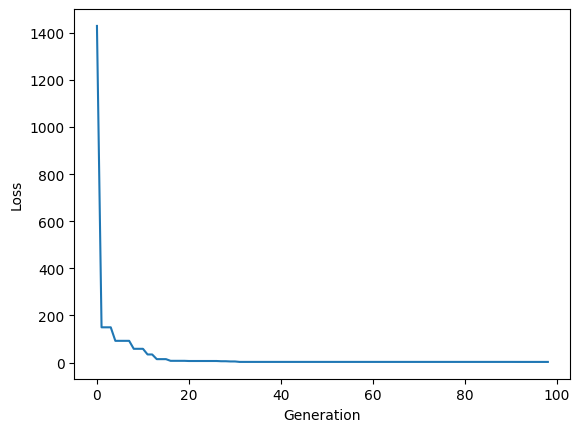

In [94]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
    plt.plot(losses_list)  
    plt.xlabel('Generation')
    plt.ylabel('Loss')
    plt.show()     

losses_list = run_GA()
visualize_loss(losses_list)

Excercise 11

In [107]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(1, n_generations):
      population, current_loss = create_new_population(population)
      losses_list.append(current_loss)

  return population

In [108]:
population = run_GA()

Best loss: 1085.2377948868595 with chromsome:  [1.5090239156088074, -0.098728351656038, 2.1082762171308866, -0.2759279817706446]
Best loss: 665.1692735666933 with chromsome:  [1.1840656440419632, -0.014422597569310192, 1.7368871106226038, -0.42791043817754826]
Best loss: 665.1692735666933 with chromsome:  [1.1840656440419632, -0.014422597569310192, 1.7368871106226038, -0.42791043817754826]
Best loss: 665.1692735666933 with chromsome:  [1.1840656440419632, -0.014422597569310192, 1.7368871106226038, -0.42791043817754826]
Best loss: 480.6227034891573 with chromsome:  [-1.0951046887037172, 0.07170870924164063, 1.4559398729941613, -0.823964173038326]
Best loss: 480.6227034891573 with chromsome:  [-1.0951046887037172, 0.07170870924164063, 1.4559398729941613, -0.823964173038326]
Best loss: 363.7992259830698 with chromsome:  [-0.6038982708931211, 0.07186817654517652, 0.06570855222147998, 0.5835569649545285]
Best loss: 156.5032050478001 with chromsome:  [0.03675827425009803, 0.00607633226176829

[3.943885296238271, 0.060065308364162906, 0.12034020776062815, -0.0016734296610749766]


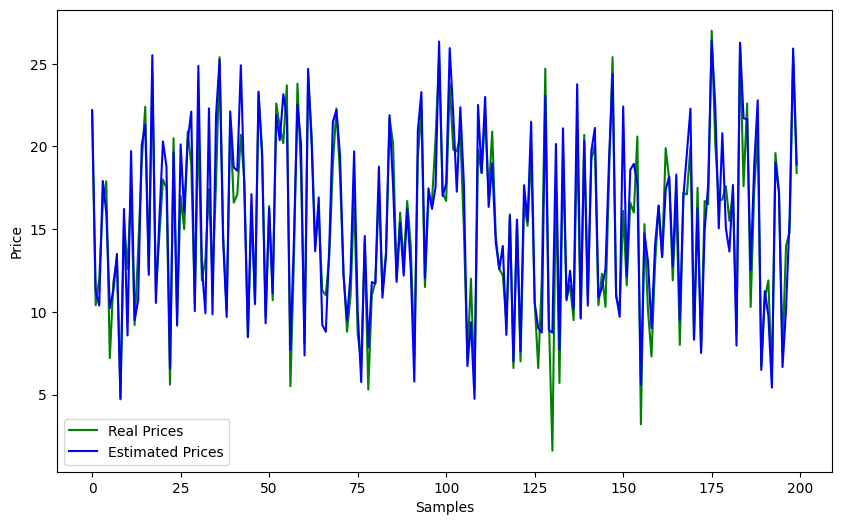

In [109]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
    y_hat = feature.dot(theta)
    estimated_prices.append(y_hat)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()